In [2]:
# Import the relevant Python libraries.
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_Abhishek').getOrCreate()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyspark.sql.functions as F

# Firsht installed pip on python to import seaborn*****NOTE

# sudo apt-get install -y python3-dev python3-setuptools
#sudo apt-get update
#sudo apt-get install python3-pip
#pip3 install -U pip
#pip install seaborn --user
import seaborn as sns

In [3]:
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName('Iteration4_Abhishek').getOrCreate()

In [4]:
# Let's read in the data.
air_data = spark.read.csv('./data.csv', header = True,inferSchema=True)

In [5]:
# The show method allows us to visualise DataFrames.
air_data.show(10)

+--------+------------------+--------------+---------+------+--------------------+----+-----+----+----+---------------------------+-----+--------+
|stn_code|     sampling_date|         state| location|agency|                type| so2|  no2|rspm| spm|location_monitoring_station|pm2_5|    date|
+--------+------------------+--------------+---------+------+--------------------+----+-----+----+----+---------------------------+-----+--------+
|     150|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|4.80|17.40|null|null|                         NA| null|2/1/1990|
|     151|February - M021990|Andhra Pradesh|Hyderabad|    NA|     Industrial Area|3.10| 7.00|null|null|                         NA| null|2/1/1990|
|     152|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|6.20|28.50|null|null|                         NA| null|2/1/1990|
|     150|   March - M031990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...|6.30|14.70|null|null|               

In [6]:
# Let's have a better view of the 20 rows of dataset
air_data.limit(10).toPandas()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",4.80,17.40,None,None,NA,None,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NA,Industrial Area,3.10,7.00,None,None,NA,None,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.20,28.50,None,None,NA,None,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.30,14.70,None,None,NA,None,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NA,Industrial Area,4.70,7.50,None,None,NA,None,3/1/1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.40,25.70,None,None,NA,None,3/1/1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",5.40,17.10,None,None,NA,None,4/1/1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NA,Industrial Area,4.70,8.70,None,None,NA,None,4/1/1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",4.20,23.00,None,None,NA,None,4/1/1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NA,Industrial Area,4.00,8.90,None,None,NA,None,5/1/1990


In [7]:
# Let's have a look at the column names. 
columns = air_data.columns
columns

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'pm2_5',
 'date']

In [8]:
# number of rows/entry in the dataset
air_data.count()

435742

In [9]:
# First row of the dataset
air_data.head()

Row(stn_code='150', sampling_date='February - M021990', state='Andhra Pradesh', location='Hyderabad', agency='NA', type='Residential, Rural and other Areas', so2='4.80', no2='17.40', rspm=None, spm=None, location_monitoring_station='NA', pm2_5=None, date='2/1/1990')

In [10]:
# A simple for loop allows us to make it even clearer. 
for item in air_data.head():
    print(item)

150
February - M021990
Andhra Pradesh
Hyderabad
NA
Residential, Rural and other Areas
4.80
17.40
None
None
NA
None
2/1/1990


In [11]:
# For type, we can use print schema. 
air_data.printSchema()

root
 |-- stn_code: string (nullable = true)
 |-- sampling_date: string (nullable = true)
 |-- state: string (nullable = true)
 |-- location: string (nullable = true)
 |-- agency: string (nullable = true)
 |-- type: string (nullable = true)
 |-- so2: string (nullable = true)
 |-- no2: string (nullable = true)
 |-- rspm: string (nullable = true)
 |-- spm: string (nullable = true)
 |-- location_monitoring_station: string (nullable = true)
 |-- pm2_5: string (nullable = true)
 |-- date: string (nullable = true)



In [12]:
for item in air_data.columns:
    nullCount=air_data.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for stn_code = 0
Number of null values for sampling_date = 0
Number of null values for state = 0
Number of null values for location = 0
Number of null values for agency = 0
Number of null values for type = 0
Number of null values for so2 = 0
Number of null values for no2 = 0
Number of null values for rspm = 859
Number of null values for spm = 12
Number of null values for location_monitoring_station = 0
Number of null values for pm2_5 = 23
Number of null values for date = 0


In [13]:
# Percentage of null values

for item in air_data.columns:
    percentage=air_data.where(F.col(item).isNull()).count()/air_data.count()*100
    print("Percentage of null values for " + item + " = %g" % percentage)

Percentage of null values for stn_code = 0
Percentage of null values for sampling_date = 0
Percentage of null values for state = 0
Percentage of null values for location = 0
Percentage of null values for agency = 0
Percentage of null values for type = 0
Percentage of null values for so2 = 0
Percentage of null values for no2 = 0
Percentage of null values for rspm = 0.197135
Percentage of null values for spm = 0.00275392
Percentage of null values for location_monitoring_station = 0
Percentage of null values for pm2_5 = 0.00527835
Percentage of null values for date = 0


In [14]:
# We can use the describe method to get some general statistics on our data. 
air_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
stn_code,435742,390.22682957056986,382.23252746929984,1,SAMP
sampling_date,435742,None,None,1/1/1987,September_1995
state,435742,None,None,Andhra Pradesh,andaman-and-nicobar-islands
location,435742,None,None,ANKLESHWAR,Yamunanagar
agency,435742,None,None,ASPB,West Bengal State Pollution Control Board
type,435742,None,None,Industrial,Sensitive Areas
so2,435742,10.829418892235154,11.17718674477089,0.00,NA
no2,435742,25.809627540768552,18.50308621160943,0.00,NA
rspm,434883,108.83278537115693,74.87242926757553,0.00,NA


In [15]:
# Select a list of relevant columns. 
air_data = air_data.drop("stn_code","agency","sampling_date","location_monitoring_station")
#air_data = air_data.select(air_data.state.cast("String"))
#air_data.printSchema()

In [16]:
# Let's have a look at the column names after dropping irrelevent. 
#columns = air_data.columns
#columns

#air_data = air_data.select(air_data.so2.cast("Integer"))

#air_data = air_data.select(air_data.spm.cast("Integer")),
#air_data = air_data.select(air_data.rspm.cast("Integer")),
#air_data = air_data.select(air_data.pm2_5.cast("Integer")),
#air_data = air_data.select(air_data.state.cast("String"))
#air_data.printSchema()
#air_data2 = (air_data.withColumn("state",col("state").cast(StringType)),
           # air_data.withColumn("so2",col("so2").cast(IntegerType)),
           # air_data.withColumn("no2",col("no2").cast(IntegerType)))
#air_data2.printSchema()
#df3.createOrReplaceTempView("CastExample")


In [17]:
            # Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

In [18]:
# Then create a variable with the correct structure.
air_data2 = air_data.select(air_data.state,air_data.type,air_data.location,air_data.so2.cast("Integer"),
                            air_data.no2.cast("Integer"),air_data.spm.cast("Integer"),
                            air_data.rspm.cast("Integer"),air_data.pm2_5.cast("Integer"),air_data.date)
#airdata2=airdata.select(air_data2.Date)
air_data2.printSchema()

air_data2.limit(5941).toPandas()


root
 |-- state: string (nullable = true)
 |-- type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- so2: integer (nullable = true)
 |-- no2: integer (nullable = true)
 |-- spm: integer (nullable = true)
 |-- rspm: integer (nullable = true)
 |-- pm2_5: integer (nullable = true)
 |-- date: string (nullable = true)



,state,type,location,so2,no2,spm,rspm,pm2_5,date
0,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4.0,17.0,NaN,NaN,None,2/1/1990
1,Andhra Pradesh,Industrial Area,Hyderabad,3.0,7.0,NaN,NaN,None,2/1/1990
2,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,28.0,NaN,NaN,None,2/1/1990
3,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,14.0,NaN,NaN,None,3/1/1990
4,Andhra Pradesh,Industrial Area,Hyderabad,4.0,7.0,NaN,NaN,None,3/1/1990
5,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6.0,25.0,NaN,NaN,None,3/1/1990
6,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,5.0,17.0,NaN,NaN,None,4/1/1990
7,Andhra Pradesh,Industrial Area,Hyderabad,4.0,8.0,NaN,NaN,None,4/1/1990
8,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4.0,23.0,NaN,NaN,None,4/1/1990
9,Andhra Pradesh,Industrial Area,Hyderabad,4.0,8.0,NaN,NaN,None,5/1/1990


In [19]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 

#air_data = spark.read.csv('.\data.csv', schema=final_struct, header = True)

air_data.printSchema()


root
 |-- state: string (nullable = true)
 |-- location: string (nullable = true)
 |-- type: string (nullable = true)
 |-- so2: string (nullable = true)
 |-- no2: string (nullable = true)
 |-- rspm: string (nullable = true)
 |-- spm: string (nullable = true)
 |-- pm2_5: string (nullable = true)
 |-- date: string (nullable = true)



In [20]:
# Let's have a better view of the 20 rows of dataset
air_data2.limit(10).toPandas()

,state,type,location,so2,no2,spm,rspm,pm2_5,date
0,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4,17,None,None,None,2/1/1990
1,Andhra Pradesh,Industrial Area,Hyderabad,3,7,None,None,None,2/1/1990
2,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6,28,None,None,None,2/1/1990
3,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6,14,None,None,None,3/1/1990
4,Andhra Pradesh,Industrial Area,Hyderabad,4,7,None,None,None,3/1/1990
5,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,6,25,None,None,None,3/1/1990
6,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,5,17,None,None,None,4/1/1990
7,Andhra Pradesh,Industrial Area,Hyderabad,4,8,None,None,None,4/1/1990
8,Andhra Pradesh,"Residential, Rural and other Areas",Hyderabad,4,23,None,None,None,4/1/1990
9,Andhra Pradesh,Industrial Area,Hyderabad,4,8,None,None,None,5/1/1990


In [21]:
for item in air_data2.columns:
    nullCount=air_data2.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for state = 0
Number of null values for type = 0
Number of null values for location = 0
Number of null values for so2 = 34646
Number of null values for no2 = 16233
Number of null values for spm = 237387
Number of null values for rspm = 40222
Number of null values for pm2_5 = 426428
Number of null values for date = 0


In [22]:
# Percentage of null values

for item in air_data2.columns:
    percentage=air_data2.where(F.col(item).isNull()).count()/air_data.count()*100
    print("Percentage of null values for " + item + " = %g" % percentage)

Percentage of null values for state = 0
Percentage of null values for type = 0
Percentage of null values for location = 0
Percentage of null values for so2 = 7.95104
Percentage of null values for no2 = 3.72537
Percentage of null values for spm = 54.4788
Percentage of null values for rspm = 9.23069
Percentage of null values for pm2_5 = 97.8625
Percentage of null values for date = 0


In [23]:
finalairdata=air_data2.na.fill(0,subset=['spm','rspm','so2','no2','pm2_5'])
#finalairdata=air_data2.na.fill('Nodate',subset=['date'])
finalairdata.show()

+--------------+--------------------+---------+---+---+---+----+-----+--------+
|         state|                type| location|so2|no2|spm|rspm|pm2_5|    date|
+--------------+--------------------+---------+---+---+---+----+-----+--------+
|Andhra Pradesh|Residential, Rura...|Hyderabad|  4| 17|  0|   0|    0|2/1/1990|
|Andhra Pradesh|     Industrial Area|Hyderabad|  3|  7|  0|   0|    0|2/1/1990|
|Andhra Pradesh|Residential, Rura...|Hyderabad|  6| 28|  0|   0|    0|2/1/1990|
|Andhra Pradesh|Residential, Rura...|Hyderabad|  6| 14|  0|   0|    0|3/1/1990|
|Andhra Pradesh|     Industrial Area|Hyderabad|  4|  7|  0|   0|    0|3/1/1990|
|Andhra Pradesh|Residential, Rura...|Hyderabad|  6| 25|  0|   0|    0|3/1/1990|
|Andhra Pradesh|Residential, Rura...|Hyderabad|  5| 17|  0|   0|    0|4/1/1990|
|Andhra Pradesh|     Industrial Area|Hyderabad|  4|  8|  0|   0|    0|4/1/1990|
|Andhra Pradesh|Residential, Rura...|Hyderabad|  4| 23|  0|   0|    0|4/1/1990|
|Andhra Pradesh|     Industrial Area|Hyd

In [24]:
for item in finalairdata.columns:
    nullCount=finalairdata.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for state = 0
Number of null values for type = 0
Number of null values for location = 0
Number of null values for so2 = 0
Number of null values for no2 = 0
Number of null values for spm = 0
Number of null values for rspm = 0
Number of null values for pm2_5 = 0
Number of null values for date = 0


Text(0.5, 1.0, 'rspm v spm')

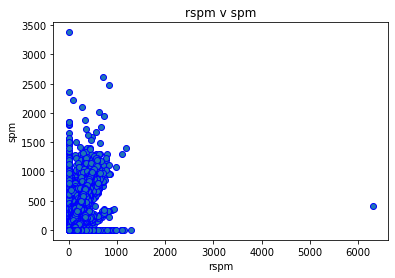

In [25]:
rspmArr = np.array(finalairdata.select('rspm').collect())
spmArr = np.array(finalairdata.select('spm').collect())

plt.scatter(rspmArr,spmArr ,  edgecolor = 'b')
plt.xlabel('rspm')
plt.ylabel('spm')
plt.title('rspm v spm')




Text(0.5, 1.0, 'so2 v no2')

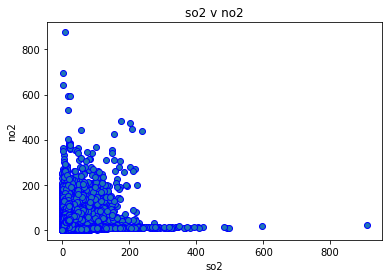

In [26]:
soArr = np.array(finalairdata.select('so2').collect())
noArr = np.array(finalairdata.select('no2').collect())

plt.scatter(soArr,noArr ,  edgecolor = 'b')
plt.xlabel('so2')
plt.ylabel('no2')
plt.title('so2 v no2')

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


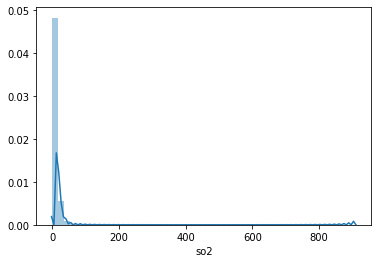

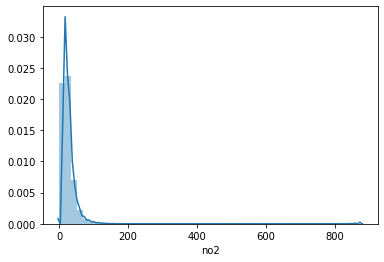

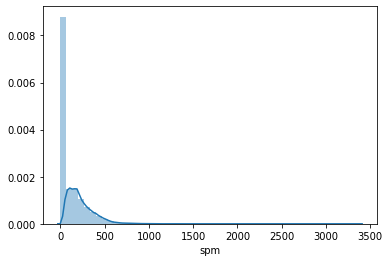

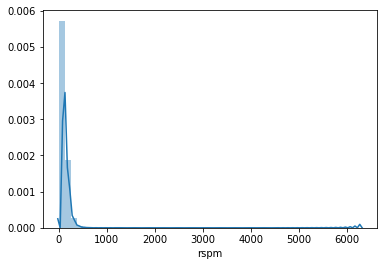

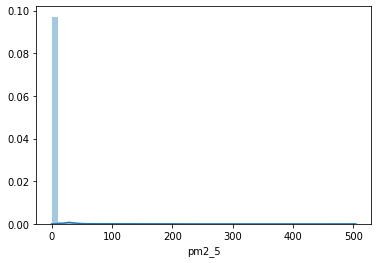

In [27]:
#Distribution of the Data 

data_plot= finalairdata.select('so2','no2','spm','rspm','pm2_5','state','type').sample(False, 0.95).toPandas()
data_plot= data_plot.dropna()
sns.distplot(data_plot.so2)
plt.show()
sns.distplot(data_plot.no2)
plt.show()
sns.distplot(data_plot.spm)
plt.show()
sns.distplot(data_plot.rspm)
plt.show()
sns.distplot(data_plot.pm2_5)
plt.show()
#sns.distplot(data_plot.state)
#plt.show()







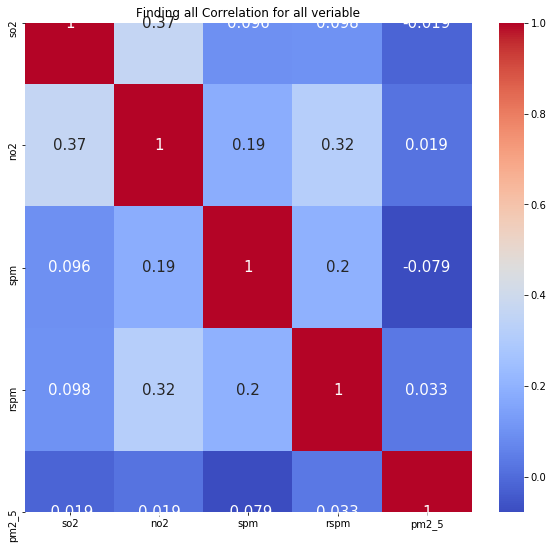

In [28]:
# checking correlation for all variables
plt.figure(figsize=(10,9))
sns.heatmap(finalairdata.sample(False, 0.95).toPandas().corr(),cmap = 'coolwarm',\
            linewidth = 0,annot= True, annot_kws={"size": 15})
plt.title('Finding all Correlation for all veriable')

print ("\n")


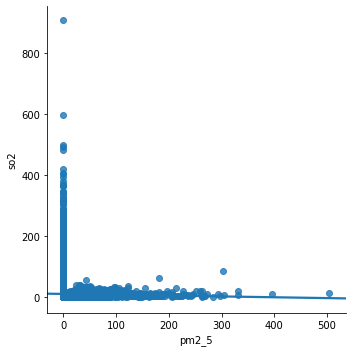

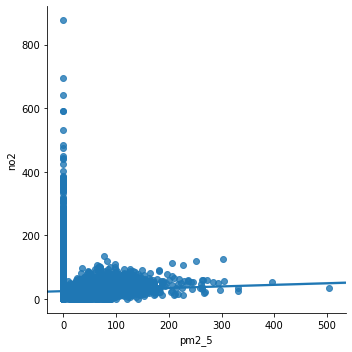

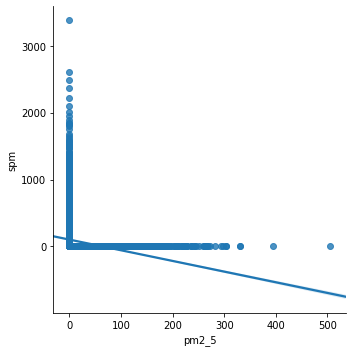

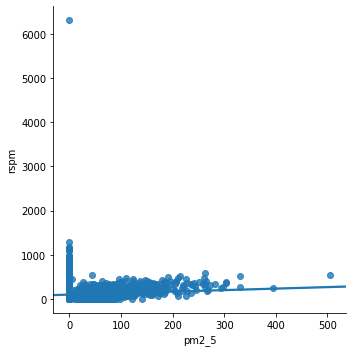

In [29]:
sns.lmplot(y = 'so2', x = 'pm2_5', data=data_plot)
plt.show()
sns.lmplot(y = 'no2', x = 'pm2_5', data=data_plot)
plt.show()
sns.lmplot(y = 'spm', x = 'pm2_5', data=data_plot)
plt.show()
sns.lmplot(y = 'rspm', x = 'pm2_5', data=data_plot)
plt.show()

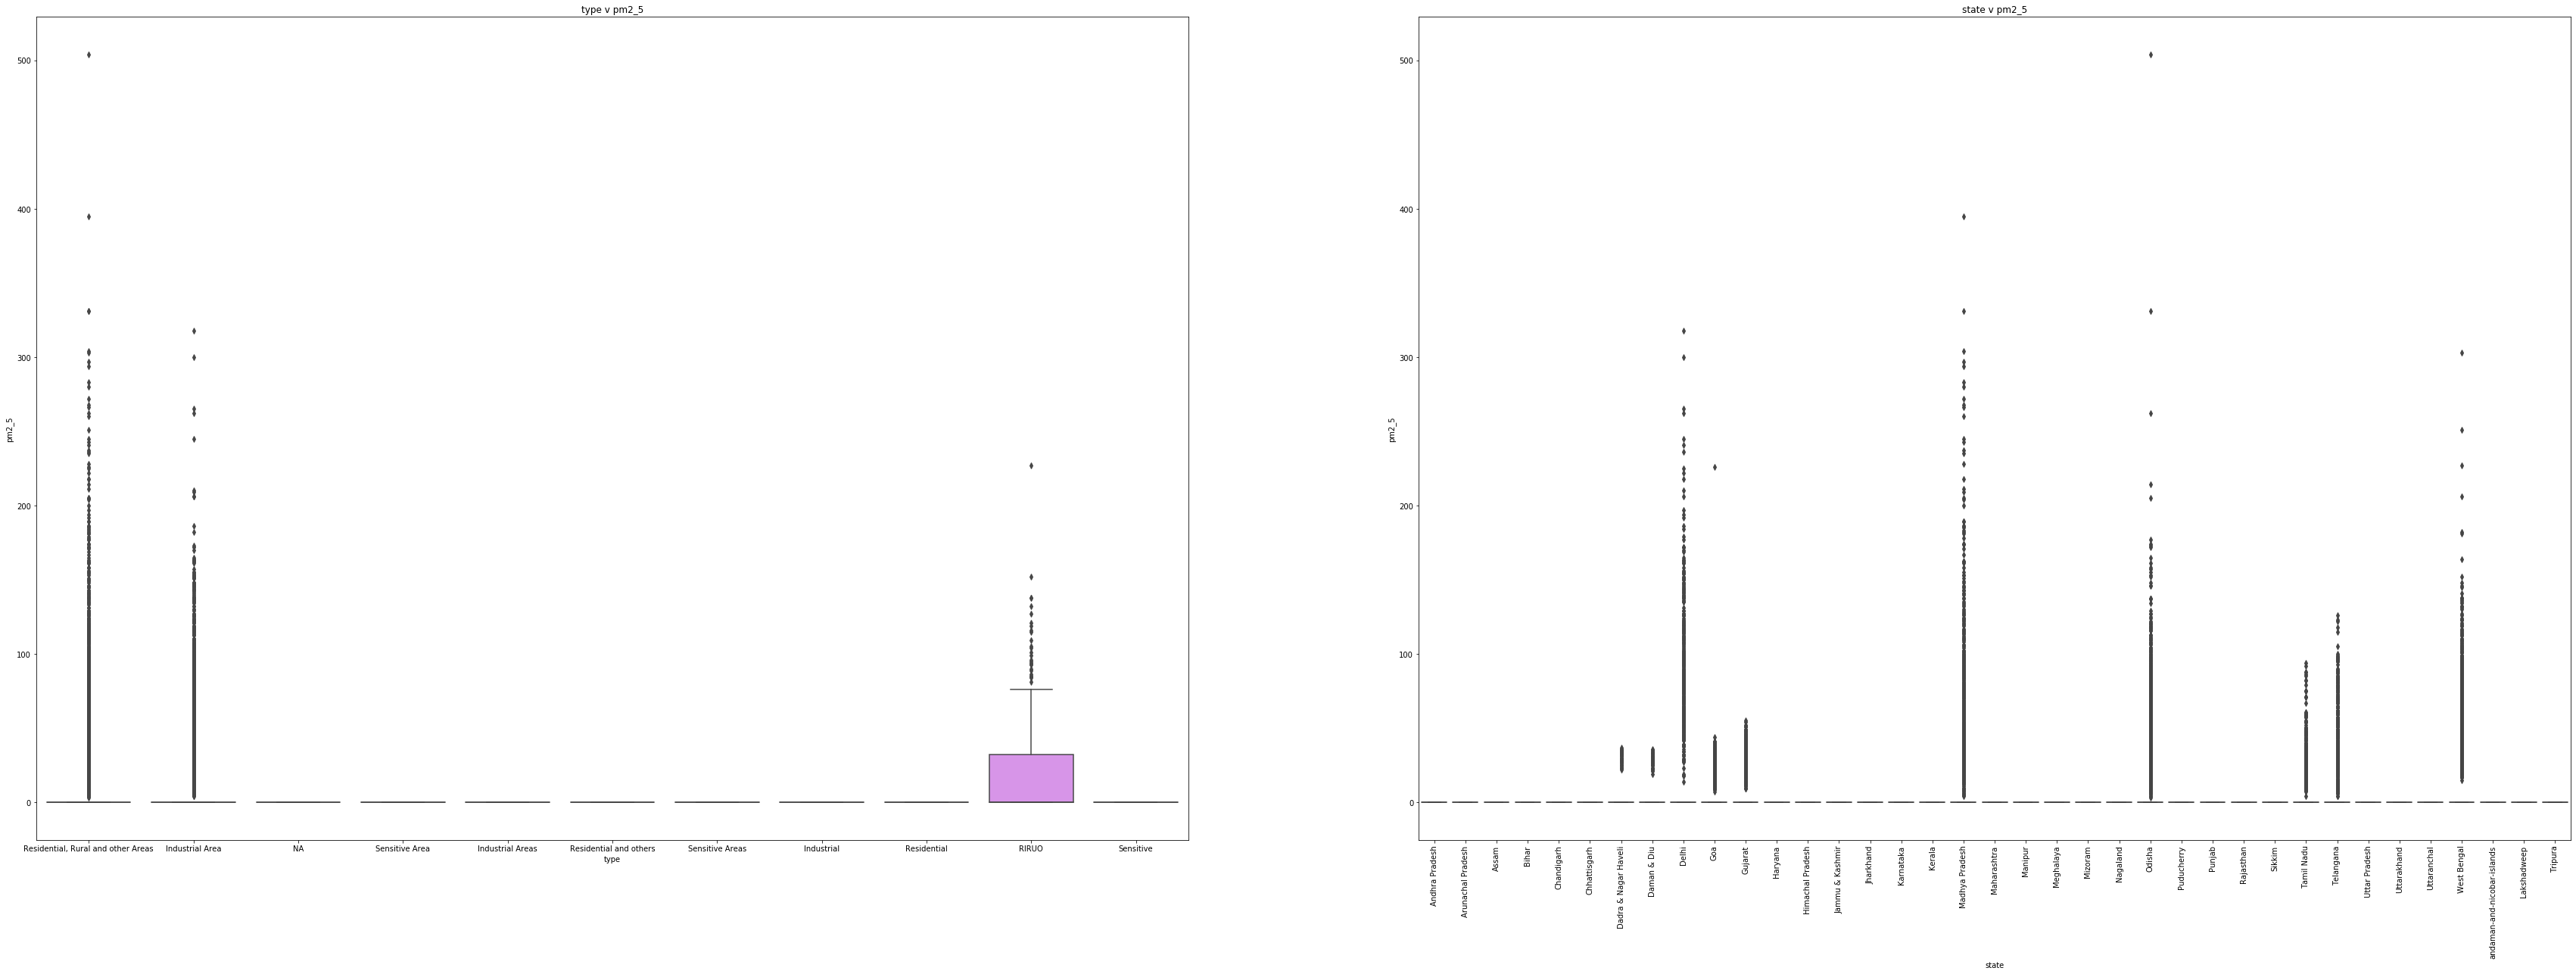

In [30]:
# categorical features v pm2_5

data_plot= finalairdata.select('pm2_5','state','type').sample(False, 0.95).toPandas()



f, axes = plt.subplots(1,2, figsize = (60,20))
labels=(data_plot['state'].unique()).tolist()




# Plot [0]
sns.boxplot( x = 'type', y = 'pm2_5',data = data_plot, ax = axes[0])
axes[0].set_xlabel('type')
axes[0].set_ylabel('pm2_5')
axes[0].set_title('type v pm2_5')

# Plot [1]
sns.boxplot(x = 'state', y = 'pm2_5', data = data_plot, ax = axes[1])
axes[1].set_xticklabels(labels, rotation=90)
axes[1].set_xlabel('state')
axes[1].set_ylabel('pm2_5')
axes[1].set_title('state v pm2_5')


plt.show()

In [31]:
#To test the merging or joining different dataset I have created 2 partition of the dataset.
(partition1, partition2) = finalairdata.randomSplit([0.5, 0.5], seed = 222)

In [32]:
partition1.count()

217977

In [33]:
partition2.count()


217765

In [34]:
# as both this datasets has same schema we can use the union() function. 
# Otherwise we could have used join() function to join 2 datasets according to a key and type of join, 
#like left, right, full and so on

finalairdata= partition1.union(partition2)

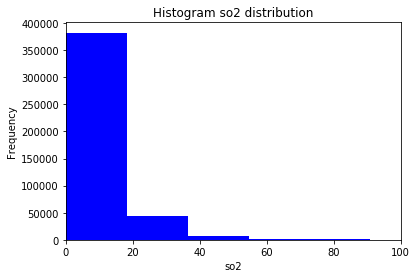

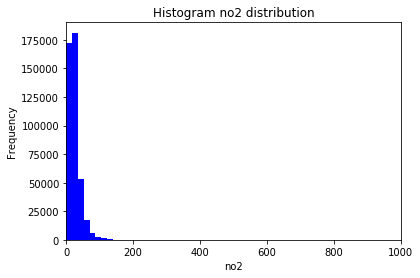

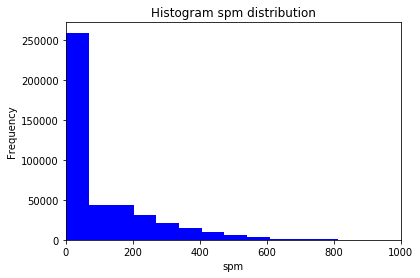

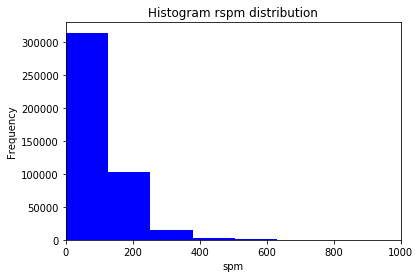

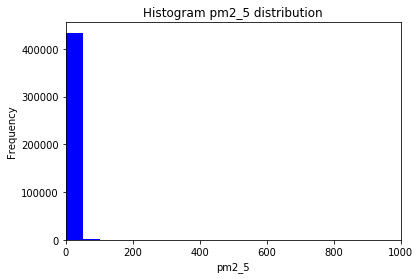

In [35]:
# Make a histogram of all the ratings in the so2 column.
so2Arr = np.array(finalairdata.select('so2').collect())
plt.hist(so2Arr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('so2')
plt.xlim([0, 100])
plt.title ('Histogram so2 distribution')
plt.show()

# Make a histogram of all the ratings in the no2 column.
no2Arr = np.array(finalairdata.select('no2').collect())
plt.hist(no2Arr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('no2')
plt.xlim([0, 1000])
plt.title ('Histogram no2 distribution')
plt.show()

# Make a histogram of all the ratings in the spm column.
spmArr = np.array(finalairdata.select('spm').collect())
plt.hist(spmArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('spm')
plt.xlim([0, 1000])
plt.title ('Histogram spm distribution')
plt.show()

# Make a histogram of all the ratings in the rspm column.
rspmArr = np.array(finalairdata.select('rspm').collect())
plt.hist(rspmArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('spm')
plt.xlim([0, 1000])
plt.title ('Histogram rspm distribution')
plt.show()

# Make a histogram of all the ratings in the pm2_5 column.
pm2Arr = np.array(finalairdata.select('pm2_5').collect())
plt.hist(pm2Arr,  bins = 10, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('pm2_5')
plt.xlim([0, 1000])
plt.title ('Histogram pm2_5 distribution')
plt.show()

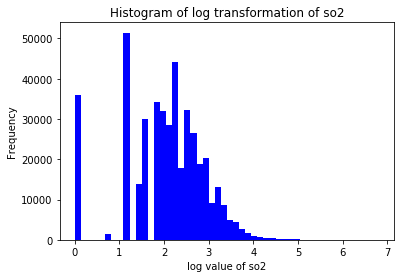

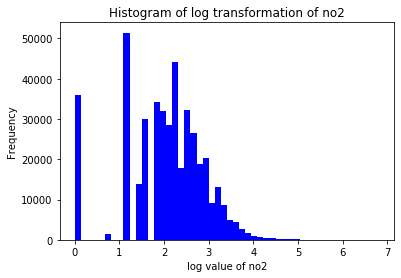

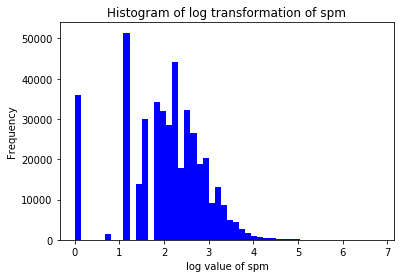

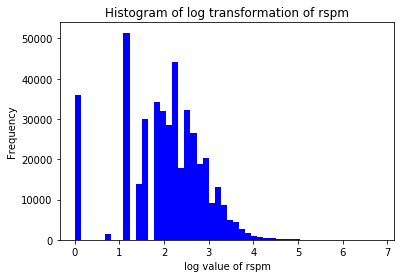

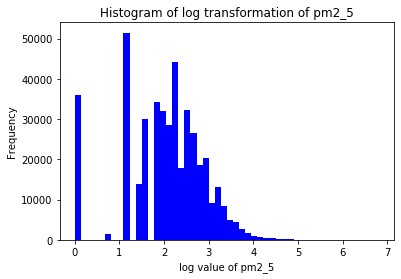

In [36]:
# Make a histogram of all the log transformation of the so2 column.

so2Arr = np.array(finalairdata.select('so2').collect())
logso2Arr =np.log(so2Arr+1)
plt.hist(logso2Arr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of so2')
plt.title ('Histogram of log transformation of so2')
plt.show()

# Make a histogram of all the log transformation of the no2 column.

no2Arr = np.array(finalairdata.select('no2').collect())
logno2Arr =np.log(so2Arr+1)
plt.hist(logno2Arr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of no2')
plt.title ('Histogram of log transformation of no2')
plt.show()
# Make a histogram of all the log transformation of the spm column.

spmArr = np.array(finalairdata.select('spm').collect())
logspmArr =np.log(so2Arr+1)
plt.hist(logspmArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of spm')
plt.title ('Histogram of log transformation of spm')
plt.show()
# Make a histogram of all the log transformation of the rspm column.

rspmArr = np.array(finalairdata.select('rspm').collect())
logrspmArr =np.log(so2Arr+1)
plt.hist(logrspmArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of rspm')
plt.title ('Histogram of log transformation of rspm')
plt.show()
# Make a histogram of all the log transformation of the pm2_5 column.

pm2Arr = np.array(finalairdata.select('pm2_5').collect())
logpm2Arr =np.log(so2Arr+1)
plt.hist(logpm2Arr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of pm2_5')
plt.title ('Histogram of log transformation of pm2_5')
plt.show()

In [37]:
finalairdata.columns

['state', 'type', 'location', 'so2', 'no2', 'spm', 'rspm', 'pm2_5', 'date']

In [38]:
for item in finalairdata.columns:
    nullCount=finalairdata.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for state = 0
Number of null values for type = 0
Number of null values for location = 0
Number of null values for so2 = 0
Number of null values for no2 = 0
Number of null values for spm = 0
Number of null values for rspm = 0
Number of null values for pm2_5 = 0
Number of null values for date = 0


In [39]:
# Select a list of relevant columns we dont need date we droped date here. 
my_cols = finalairdata.select([
 'state',
'so2',
 'no2',
 'rspm',
 'spm',
 'pm2_5',
 'type',
 ])
air_quality=my_cols

In [40]:
air_quality.count()

435742

In [41]:
air_quality.show()

+--------------+---+---+----+---+-----+---------------+
|         state|so2|no2|rspm|spm|pm2_5|           type|
+--------------+---+---+----+---+-----+---------------+
|Andhra Pradesh|  0|  0|  20|  0|    0|Industrial Area|
|Andhra Pradesh|  0| 17|  23|  0|    0|Industrial Area|
|Andhra Pradesh|  2|  5|  20|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 11|  33|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 14|  13|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 14|  41|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 16|  14|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 17|  24|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 18|  14|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 19|  38|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 20|  75|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 22| 116|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 24|  34|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 27|  23|  0|    0|Industrial Area|
|Andhra Pradesh|  2| 28|  50|  0|    0|Industria

In [42]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [43]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='type',outputCol='typeIndex').fit(air_quality)
air_quality= type_indexer.transform(air_quality)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
air_quality = OneHotEncoder(inputCol='typeIndex',outputCol='typeVec').transform(air_quality)

In [44]:
air_quality.show(6000)

+--------------+---+---+----+----+-----+--------------------+---------+--------------+
|         state|so2|no2|rspm| spm|pm2_5|                type|typeIndex|       typeVec|
+--------------+---+---+----+----+-----+--------------------+---------+--------------+
|Andhra Pradesh|  0|  0|  20|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  0| 17|  23|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2|  5|  20|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 11|  33|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 14|  13|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 14|  41|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 16|  14|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 17|  24|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|
|Andhra Pradesh|  2| 18|  14|   0|    0|   

In [45]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='state',outputCol='stateIndex').fit(air_quality)
air_quality= type_indexer.transform(air_quality)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
air_quality = OneHotEncoder(inputCol='stateIndex',outputCol='stateVec').transform(air_quality)

In [46]:
air_quality.show(6000)

+--------------+---+---+----+----+-----+--------------------+---------+--------------+----------+--------------+
|         state|so2|no2|rspm| spm|pm2_5|                type|typeIndex|       typeVec|stateIndex|      stateVec|
+--------------+---+---+----+----+-----+--------------------+---------+--------------+----------+--------------+
|Andhra Pradesh|  0|  0|  20|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  0| 17|  23|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2|  5|  20|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 11|  33|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 14|  13|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 14|  41|   0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0

In [47]:
#pairplot of the variable according to Types
# NOTE:Please Uncomment while run and comment this section waisely as require it gives load on run of mesdel
#sns.pairplot(air_quality.sample(False, 0.95).toPandas(), hue = "type")

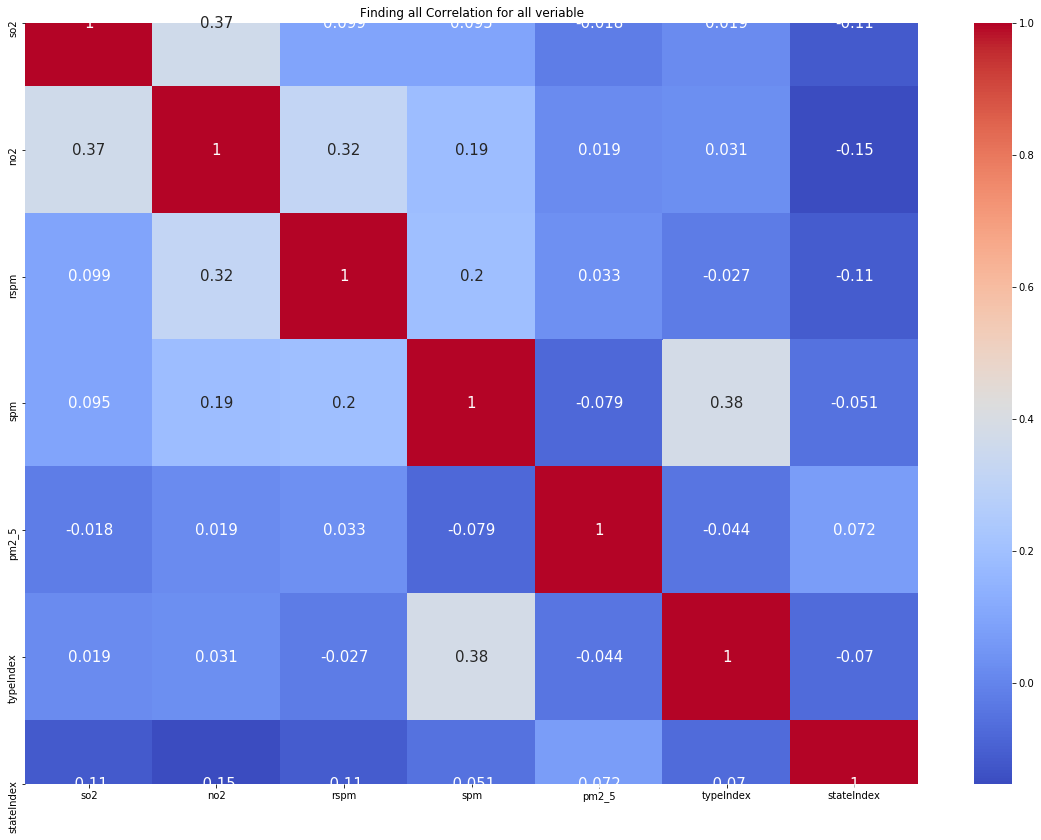

In [48]:
# checking correlation for all variables after catagorial conversion
plt.figure(figsize=(20,14))
sns.heatmap(air_quality.sample(False, 0.95).toPandas().corr(),cmap = 'coolwarm',\
            linewidth = 0,annot= True, annot_kws={"size": 15})
plt.title('Finding all Correlation for all veriable')

print ("\n")

In [49]:
#pairplot of the variable according to Types
#sns.pairplot(air_quality.sample(False, 0.95).toPandas(), hue = "type")

In [50]:
air_quality.show()

+--------------+---+---+----+---+-----+---------------+---------+--------------+----------+--------------+
|         state|so2|no2|rspm|spm|pm2_5|           type|typeIndex|       typeVec|stateIndex|      stateVec|
+--------------+---+---+----+---+-----+---------------+---------+--------------+----------+--------------+
|Andhra Pradesh|  0|  0|  20|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  0| 17|  23|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2|  5|  20|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 11|  33|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 14|  13|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 14|  41|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|
|Andhra Pradesh|  2| 16|  14|  0|    

In [51]:
air_quality= air_quality.withColumn('logrspm', F.log('rspm'))

air_quality.columns

['state',
 'so2',
 'no2',
 'rspm',
 'spm',
 'pm2_5',
 'type',
 'typeIndex',
 'typeVec',
 'stateIndex',
 'stateVec',
 'logrspm']

In [52]:
air_quality.show()

+--------------+---+---+----+---+-----+---------------+---------+--------------+----------+--------------+------------------+
|         state|so2|no2|rspm|spm|pm2_5|           type|typeIndex|       typeVec|stateIndex|      stateVec|           logrspm|
+--------------+---+---+----+---+-----+---------------+---------+--------------+----------+--------------+------------------+
|Andhra Pradesh|  0|  0|  20|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])| 2.995732273553991|
|Andhra Pradesh|  0| 17|  23|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|3.1354942159291497|
|Andhra Pradesh|  2|  5|  20|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])| 2.995732273553991|
|Andhra Pradesh|  2| 11|  33|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|3.4965075614664802|
|Andhra Pradesh|  2| 14|  13|  0|    0|Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|2.5649493574

In [53]:
# to view statistical information of the selected column(s)
air_quality.describe('logrspm').toPandas()

,summary,logrspm
0,count,394754
1,mean,4.479536651075856
2,stddev,0.6688654920592184
3,min,0.0
4,max,8.749415406663651


In [54]:
# The input columns are the feature columns names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
     'so2',
     'typeVec',
     'no2',
     'spm',
     'pm2_5',
     'stateVec'],
    outputCol="patterns")

In [55]:
#randomly split data into training and test dataset
(train_data, test_data) = air_quality.randomSplit([0.7, 0.3], seed = 111)

In [56]:
#Linear Regression Starts from here




lr_train_data = assembler.transform(train_data)
lr_test_data = assembler.transform(test_data)
lr_train_data .show(5000)

+--------------+---+---+----+---+-----+--------------------+---------+--------------+----------+--------------+------------------+--------------------+
|         state|so2|no2|rspm|spm|pm2_5|                type|typeIndex|       typeVec|stateIndex|      stateVec|           logrspm|            patterns|
+--------------+---+---+----+---+-----+--------------------+---------+--------------+----------+--------------+------------------+--------------------+
|Andhra Pradesh|  0|  0|   0|  0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|              null|(50,[2,16],[1.0,1...|
|Andhra Pradesh|  0|  0|   0|  0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|              null|(50,[2,16],[1.0,1...|
|Andhra Pradesh|  0|  0|   0|  0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|       2.0|(36,[2],[1.0])|              null|(50,[2,16],[1.0,1...|
|Andhra Pradesh|  0|  0|   0|  0|    0|     Industrial Area|      1.0|(10,[1],[1.0])|   

In [57]:
# importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [58]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?


lr = LinearRegression(featuresCol='patterns', labelCol='rspm', predictionCol='prediction')

In [59]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(lr_train_data)

In [60]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-0.32924003677136926,105.21616182560156,110.99233714162244,94.68182938599496,106.51417671428487,104.0637362689218,93.25598339689202,3.6109265641526647,125.66575635470345,-19.020461768107964,-4.521750630513926,1.238917274876116,0.06450920821876692,0.4385627452621419,-8.205383532184943,57.18761876762674,-15.192308012963885,51.302680792277485,19.687459567005842,-32.74479996504043,-7.918060719467298,-34.30858023138024,-6.778448457261363,-27.88444902375395,9.517479470359712,12.697581052922747,-7.302873879742763,-17.820365740222787,13.694011183895011,3.0291352565519896,14.472167377105057,-20.1557498295477,46.880359214717025,-27.97485282002503,-10.642738347924588,-4.2508434341517285,-45.84976885367718,34.65935313365377,8.510782217758214,-33.0680262262584,62.70107983230564,36.13138775289369,-49.52258825977705,-34.53730159390613,19.132909760072643,7.5967469858546375,-19.00291178210669,0.0,37.321641060870604,37.321641060870604] Intercept: -40.88453096756947


In [61]:
# Let's evaluate the model against the test data.
lr_train_results = lrModel.evaluate(lr_train_data)

In [62]:
# Interesting results! This shows the difference between the predicted value and the test data.
lr_train_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on train data: {}".format(lr_train_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on train data: {}".format(lr_train_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on train data: {}".format(lr_train_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on train data: {}".format(lr_train_results.r2))

+------------------+
|         residuals|
+------------------+
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
|-50.43733773375153|
+------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data: 44.53439965745663
Mean Squared Error (mse) on train data: 4365.049233149975
Root Mean Squared Error (rmse) on train data: 66.06851922928178
R Squared (R2) on train data: 0.2836580108607709


In [63]:
# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)

In [64]:
# Interesting results! This shows the difference between the predicted value and the test data.
lr_test_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on test data: {}".format(lr_test_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on test data: {}".format(lr_test_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on test data: {}".format(lr_test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on test data: {}".format(lr_test_results.r2))

+------------------+
|         residuals|
+------------------+
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
| -54.9154981610891|
|-50.43733773375153|
| -38.6049904054616|
| -38.6049904054616|
| -38.6049904054616|
+------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data: 44.639345169313124
Mean Squared Error (mse) on test data: 4309.955724005079
Root Mean Squared Error (rmse) on test data: 65.65025303839337
R Squared (R2) on test data: 0.2873797507981707


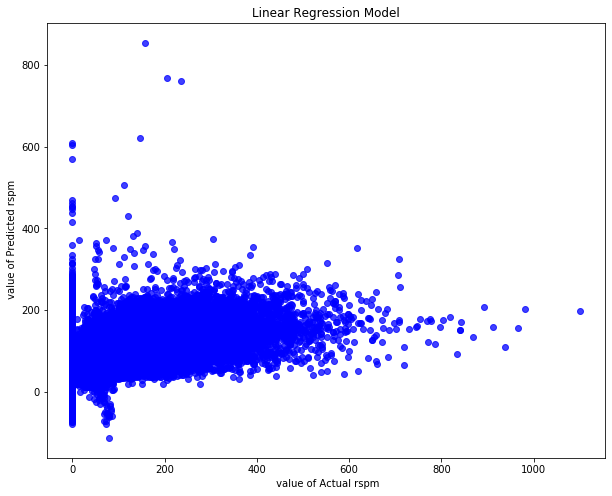

In [65]:
 #view this relationship between predictions and actual_values graphically with a scatter plot.

lr_PriceArr = np.array(lr_test_results.predictions.select('rspm').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PriceArr,lr_PredictionArr, alpha=.75,
            color='b')  # alpha helps to show overlapping data
 
plt.xlabel(' value of Actual rspm')
plt.ylabel(' value of Predicted rspm')
plt.title('Linear Regression Model')

plt.show()

In [66]:
# Random forest Regression start from here
#importing Random Forest Regression
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics# Useing the model on train data to view the result of the model on train data

#rf_train_results = rf_model.transform(train_data)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [67]:

# train RandomForest model
rf = RandomForestRegressor(labelCol="rspm", featuresCol="patterns", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])

In [68]:
# creating the Random forest model
rf_model = rf_pipeline.fit(train_data)

In [69]:
# Useing the model on train data to view the result of the model on train data

rf_train_results = rf_model.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_train_results.select('rspm','prediction', 'patterns').show(10)


rf_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_evaluator.evaluate(rf_train_results,{rf_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|66.60420378569661|(50,[4,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 44.647
Mean Squared Error (mse) on train data = 4115.45
Root Mean Squared Error (rmse) on train data = 64.1518
R Squared (R2) on train data = 0.324619


In [70]:
# Make predictions on test data
rf_test_results = rf_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_test_results.select('rspm','prediction', 'patterns').show(10)



rf_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|67.77380412455472|(50,[2,16],[1.0,1...|
|   0|66.60420378569661|(50,[4,16],[1.0,1...|
|   0|65.96981358695078|(50,[3,16],[1.0,1...|
|   0|65.96981358695078|(50,[3,16],[1.0,1...|
|   0|65.96981358695078|(50,[3,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 44.8849
Mean Squared Error (mse) on test data = 4079
Root Mean Squared Error (rmse) on test data = 63.867
R Squared (R2) on test data = 0.325567


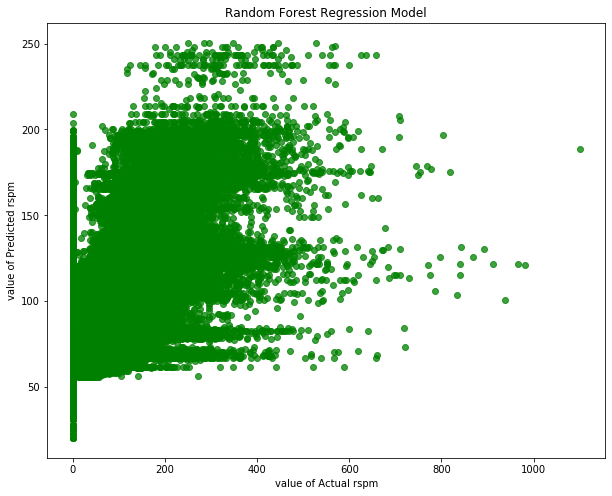

In [71]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_PriceArr = np.array(rf_test_results.select('rspm').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Random Forest Regression Model')

plt.show()

In [72]:
# Evaluate model
rf_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=rf.getLabelCol(), predictionCol=rf.getPredictionCol())

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [10, 20, 40])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [10, 100])
             .build())

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rf_paramGrid,
                      evaluator = rf_cv_evaluator,
                      numFolds = 5)

In [73]:
# creating the pipeline with cross validator and features
rf_cv_pipeline = Pipeline(stages=[assembler, rf_cv])

# fitting the train data 
rf_cv_pipelineModel = rf_cv_pipeline.fit(train_data)

In [74]:
# Useing the model on train data to view the result of the model on train data

rf_cv_train_results = rf_cv_pipelineModel.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
rf_cv_train_results.select('rspm','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %rf_cv_evaluator.evaluate(rf_cv_train_results,{rf_cv_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0|71.40540584353586|(50,[4,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 43.9925
Mean Squared Error (mse) on train data = 4004.76
Root Mean Squared Error (rmse) on train data = 63.2832
R Squared (R2) on train data = 0.342785


In [75]:
# Use test set here so we can measure the accuracy of our model on new data

rf_cv_test_results = rf_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_cv_test_results.select('rspm','prediction', 'patterns').show(10)


rf_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0| 71.2053760689816|(50,[2,16],[1.0,1...|
|   0|71.40540584353586|(50,[4,16],[1.0,1...|
|   0|70.68486418035071|(50,[3,16],[1.0,1...|
|   0|70.68486418035071|(50,[3,16],[1.0,1...|
|   0|70.68486418035071|(50,[3,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 44.247
Mean Squared Error (mse) on test data = 3971.07
Root Mean Squared Error (rmse) on test data = 63.0164
R Squared (R2) on test data = 0.343412


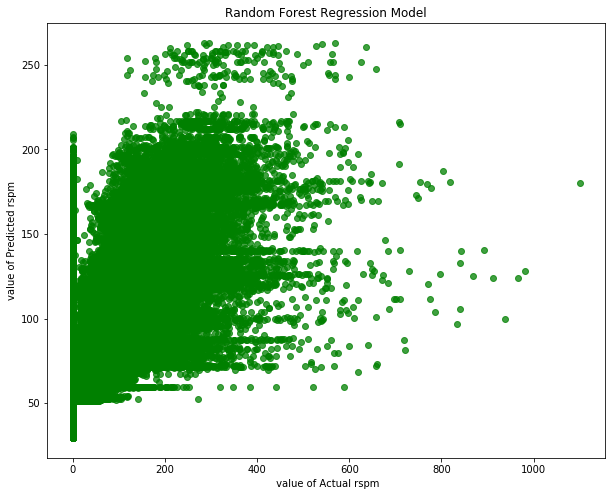

In [76]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_cv_PriceArr = np.array(rf_cv_test_results.select('rspm').collect())
rf_cv_PredictionArr = np.array(rf_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_cv_PriceArr,rf_cv_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel(' value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Random Forest Regression Model')

plt.show()

In [77]:
# Gradient Boosting Tree Regression starts here

from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [78]:
# train RandomForest model
gbr = GBTRegressor(labelCol="rspm", featuresCol="patterns", predictionCol = "prediction")

gbr_pipeline = Pipeline(stages=[assembler, gbr])

In [79]:
#Creating the model for Gradient Boosting Tree Regression

gbr_model = gbr_pipeline.fit(train_data)

In [80]:
# Useing the model on train data to view the result of the model on train data

gbr_train_results = gbr_model.transform(train_data)

# Let's have a look into the predictions on the traindata from model.
gbr_train_results.select('rspm','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_evaluator.evaluate(gbr_train_results,{gbr_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|54.87806392722787|(50,[4,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 39.1264
Mean Squared Error (mse) on train data = 3425.77
Root Mean Squared Error (rmse) on train data = 58.5301
R Squared (R2) on train data = 0.437802


In [81]:
# Make predictions on test data
gbr_test_results = gbr_model.transform(test_data)

# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_test_results.select('rspm','prediction', 'patterns').show(10)


gbr_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|53.90771491756643|(50,[2,16],[1.0,1...|
|   0|54.87806392722787|(50,[4,16],[1.0,1...|
|   0|53.90771491756643|(50,[3,16],[1.0,1...|
|   0|53.90771491756643|(50,[3,16],[1.0,1...|
|   0|53.90771491756643|(50,[3,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 39.3335
Mean Squared Error (mse) on test data = 3393.32
Root Mean Squared Error (rmse) on test data = 58.2522
R Squared (R2) on test data = 0.43894


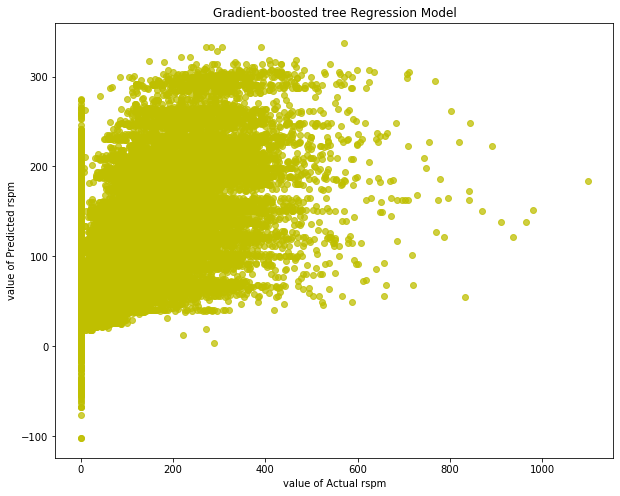

In [82]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_PriceArr = np.array(gbr_test_results.select('rspm').collect())
gbr_PredictionArr = np.array(gbr_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_PriceArr,gbr_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel('value of Predicted rspm')
plt.title('Gradient-boosted tree Regression Model')

plt.show()

In [83]:
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.
#In practice, to get the highest accuracy, we would likely want to try deeper trees (10 or higher) and 
#more trees in the ensemble (>100).
gbr_paramGrid = ParamGridBuilder()\
  .addGrid(gbr.maxDepth, [2, 5])\
  .addGrid(gbr.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  
#This tells CrossValidator how well we are doing by comparing the true labels with predictions.
gbr_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbr.getLabelCol(), predictionCol=gbr.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
gbr_cv = CrossValidator(estimator=gbr, evaluator=gbr_cv_evaluator, estimatorParamMaps=gbr_paramGrid)

In [84]:
#creating pipeline with the features and model
gbr_cv_pipeline = Pipeline(stages=[assembler, gbr_cv])

# fitting the train data and transforming the test data

gbr_cv_pipelineModel = gbr_cv_pipeline.fit(train_data)

In [85]:
# Useing the model on train data to view the result of the model on train data

gbr_cv_train_results = gbr_cv_pipelineModel.transform(train_data)

gbr_cv_train_results.select('rspm','prediction', 'patterns').show(10)


gbr_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mae"}))

print("Mean Squared Error (mse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "mse"}))

print("Root Mean Squared Error (rmse) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator .metricName: "rmse"}))

print("R Squared (R2) on train data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_train_results,{gbr_cv_evaluator.metricName: "r2"}))

+----+-----------------+--------------------+
|rspm|       prediction|            patterns|
+----+-----------------+--------------------+
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|54.43519593352498|(50,[2,16],[1.0,1...|
|   0|41.13514098949368|(50,[4,16],[1.0,1...|
+----+-----------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on train data = 34.2149
Mean Squared Error (mse) on train data = 2850.77
Root Mean Squared Error (rmse) on train data = 53.3926
R Squared (R2) on train data = 0.532164


In [86]:
# using the model to get prediction on test data
gbr_cv_test_results = gbr_cv_pipelineModel.transform(test_data)


# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_cv_test_results.select('rspm','prediction', 'patterns').show(10)

gbr_cv_evaluator = RegressionEvaluator(labelCol = "rspm")
print("Mean Absolute Error (mae) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "r2"}))

+----+------------------+--------------------+
|rspm|        prediction|            patterns|
+----+------------------+--------------------+
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 54.43519593352498|(50,[2,16],[1.0,1...|
|   0| 41.13514098949368|(50,[4,16],[1.0,1...|
|   0|38.792735220585385|(50,[3,16],[1.0,1...|
|   0|38.792735220585385|(50,[3,16],[1.0,1...|
|   0|38.792735220585385|(50,[3,16],[1.0,1...|
+----+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 34.4594
Mean Squared Error (mse) on test data = 2827.97
Root Mean Squared Error (rmse) on test data = 53.1786
R Squared (R2) on test data = 0.532416


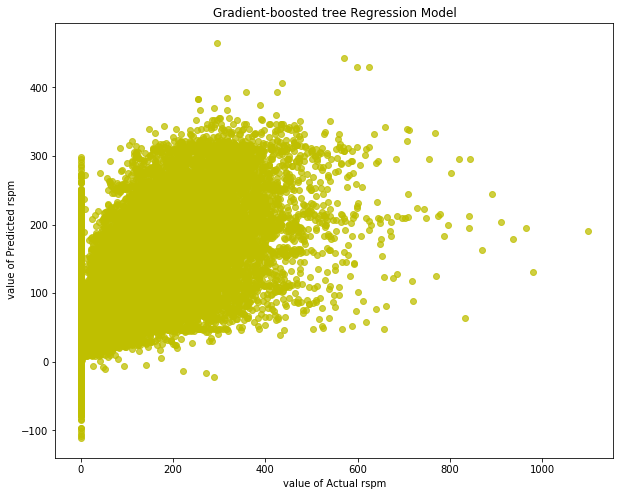

In [87]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_cv_PriceArr = np.array(gbr_cv_test_results.select('rspm').collect())
gbr_cv_PredictionArr = np.array(gbr_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_cv_PriceArr,gbr_cv_PredictionArr, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('value of Actual rspm')
plt.ylabel(' value of Predicted rspm')
plt.title('Gradient-boosted tree Regression Model')

plt.show()
